In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df  = pd.read_csv('Dataset-Mental-Disorders.csv')

In [3]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [5]:
df.columns

Index(['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [6]:
yes_no_mapping = {'YES':1, 'NO':0}

In [7]:
df[['Mood Swing', 'Suicidal thoughts', 'Anorxia','Authority Respect', 'Try-Explanation', 
    'Aggressive Response','Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes','Overthinking']] = (
    df[['Mood Swing', 'Suicidal thoughts', 'Anorxia','Authority Respect', 'Try-Explanation', 
        'Aggressive Response','Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes','Overthinking']]
    .replace(yes_no_mapping)
    .infer_objects(copy=False)  
)

In [8]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,1,YES,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal


In [9]:
df['Suicidal thoughts'].unique()

array(['YES ', 1, 0], dtype=object)

In [10]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].replace({'YES ': 1})

In [11]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal


In [12]:
for col in ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Sadness: ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Unique values in Euphoric: ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Unique values in Exhausted: ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Unique values in Sleep dissorder: ['Sometimes' 'Most-Often' 'Usually' 'Seldom']


In [13]:
for col in ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']:
    df[col] = df[col].map({'Seldom':1,'Sometimes':2, 'Usually':3, 'Most-Often':4})

In [14]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,2,4,2,2,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,3,1,3,4,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal


In [15]:
columns = ['Sexual Activity', 'Concentration', 'Optimisim']
for column in columns:
    df[column] = df[column].astype(str).str.extract('(\d)')
    df[column] = pd.to_numeric(df[column])
    
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,Patiant-03,2,4,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,Patiant-04,3,1,3,4,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


In [16]:
df.drop("Patient Number", axis=1, inplace=True)
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,2,4,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,3,1,3,4,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


In [17]:
df.columns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim', 'Expert Diagnose'],
      dtype='object')

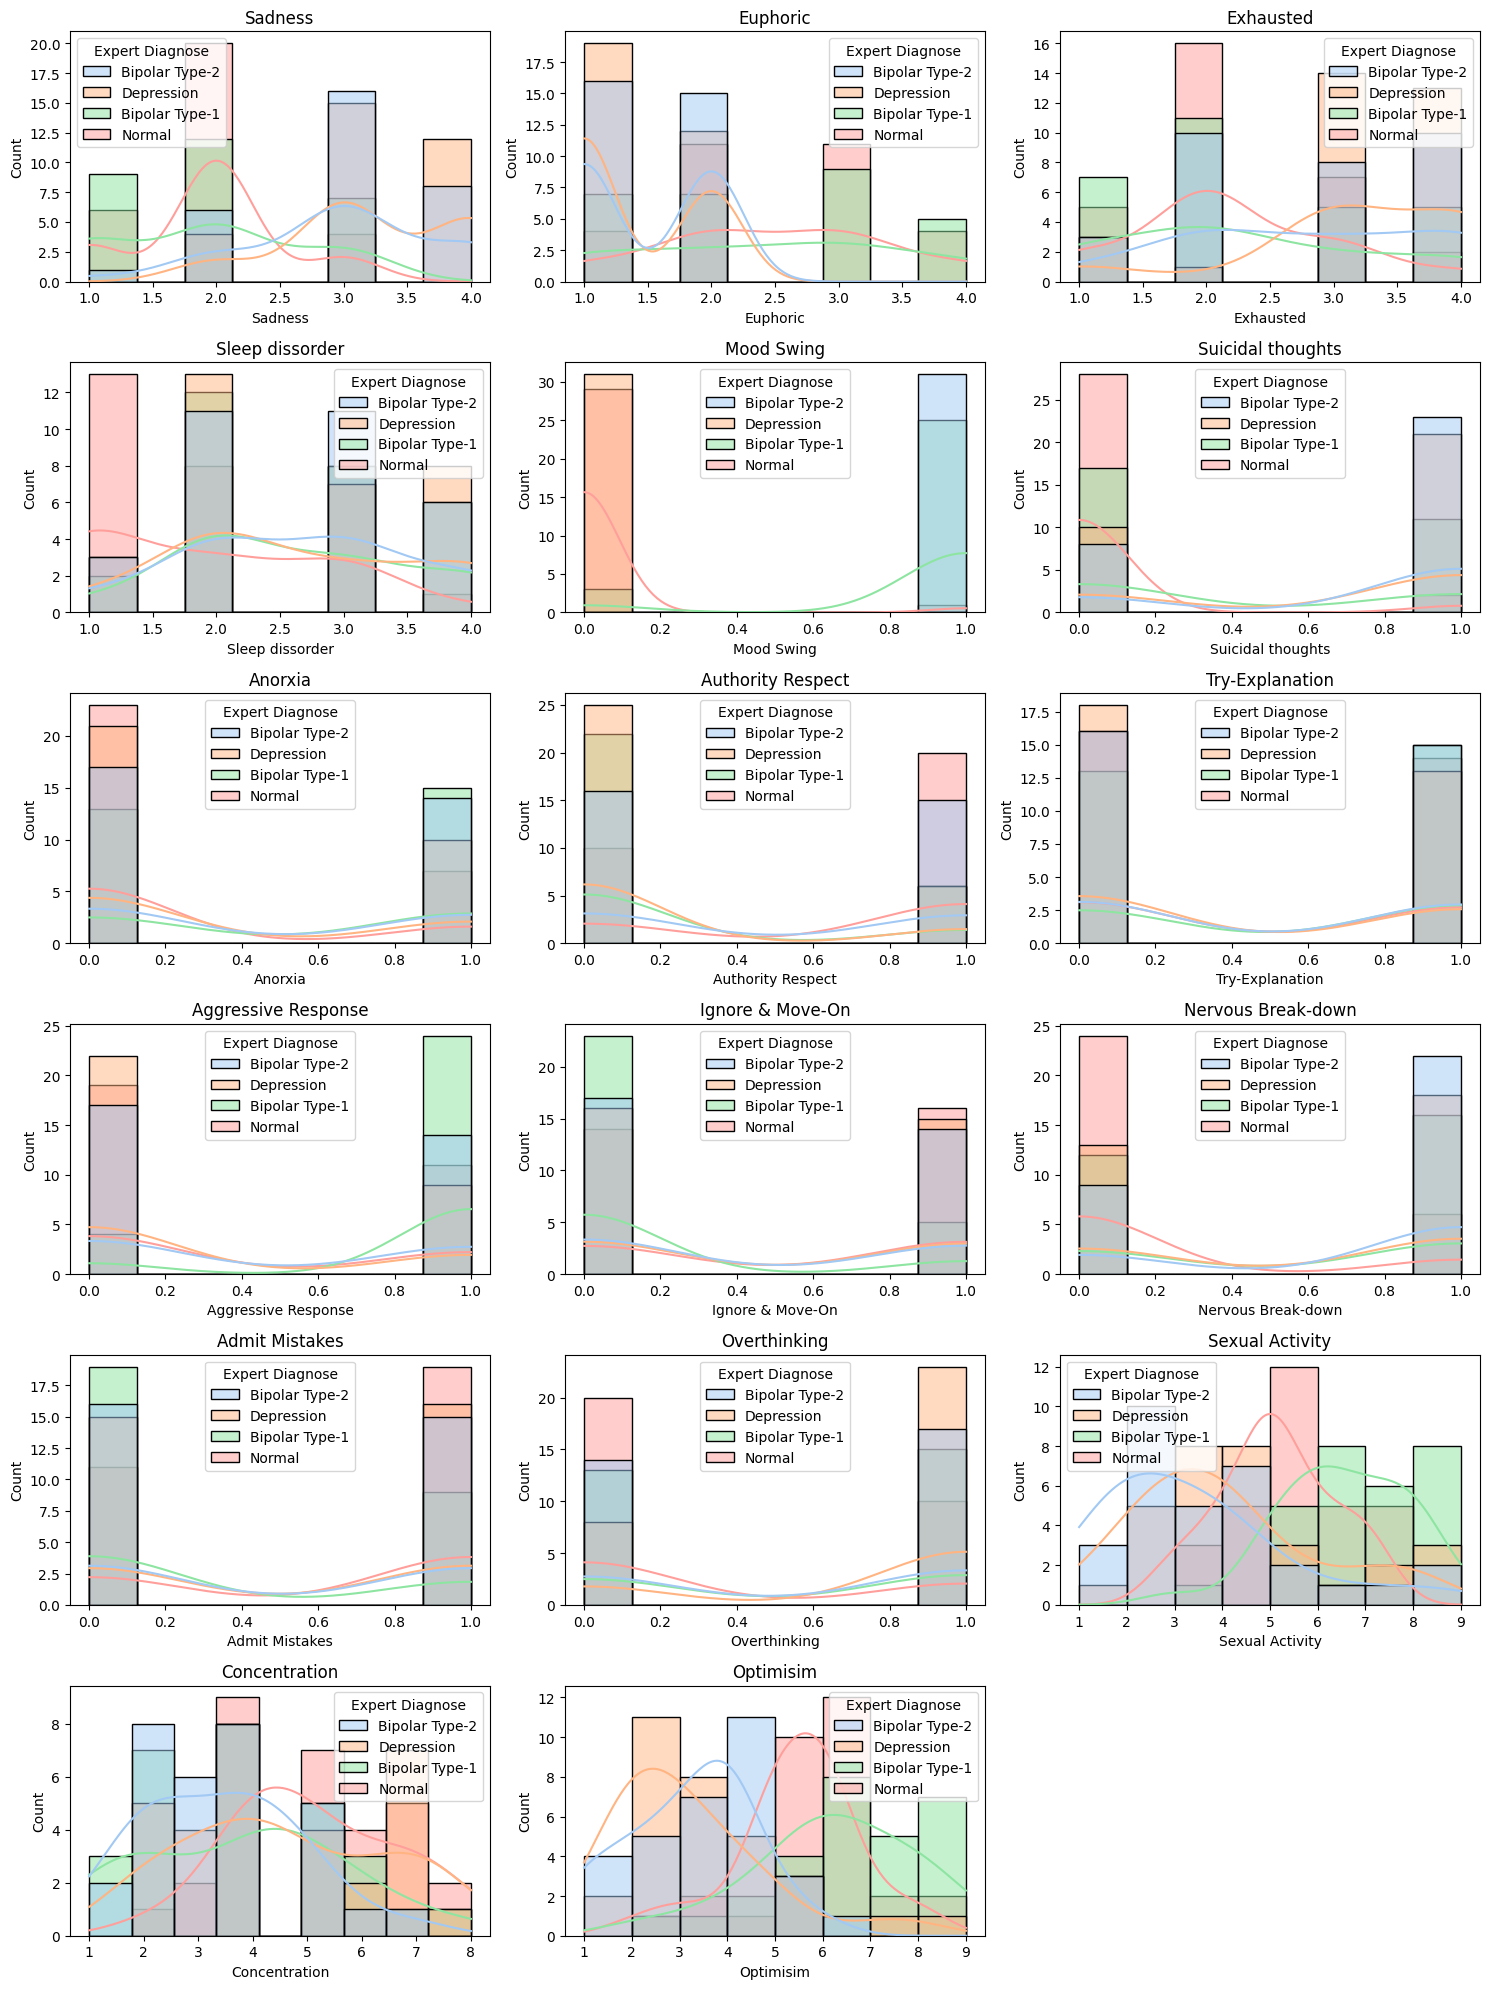

In [18]:
numeric_columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim']
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(6,3, i)
    sns.histplot(data=df, x=col, kde=True, hue="Expert Diagnose",palette="pastel")
    plt.title(col)
    plt.tight_layout()
plt.show()

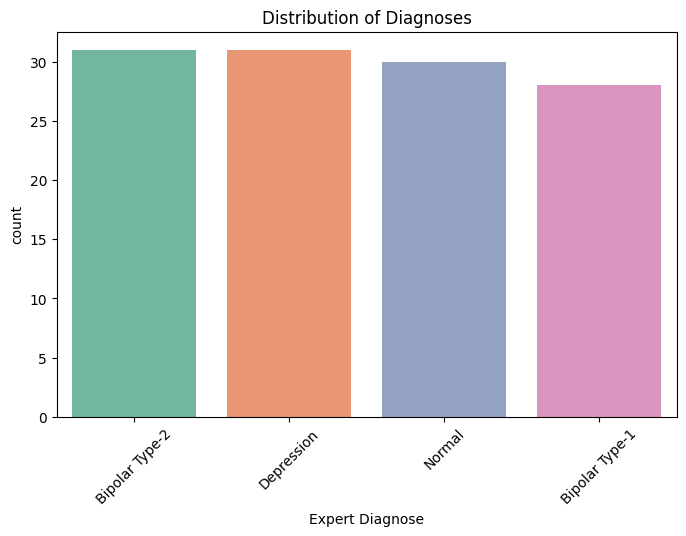

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Expert Diagnose', order=df['Expert Diagnose'].value_counts().index, palette='Set2')
plt.title("Distribution of Diagnoses")
plt.xticks(rotation=45)
plt.show()

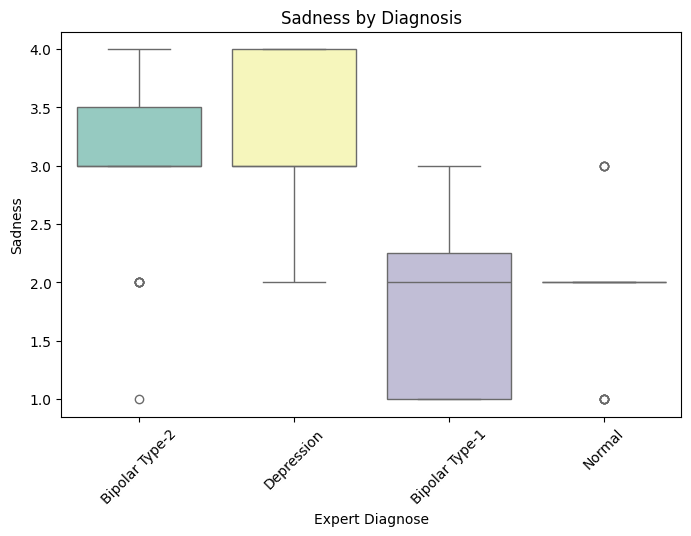

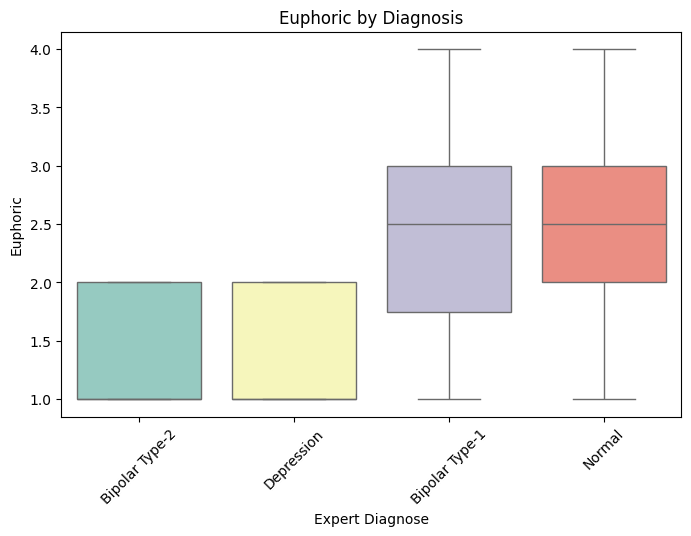

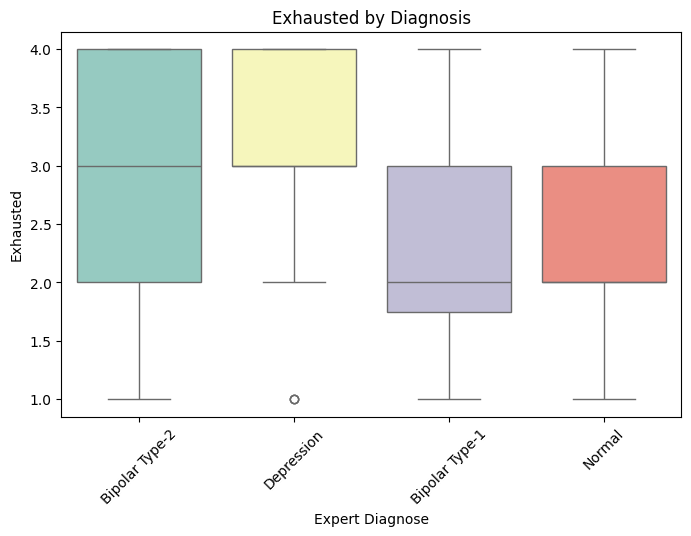

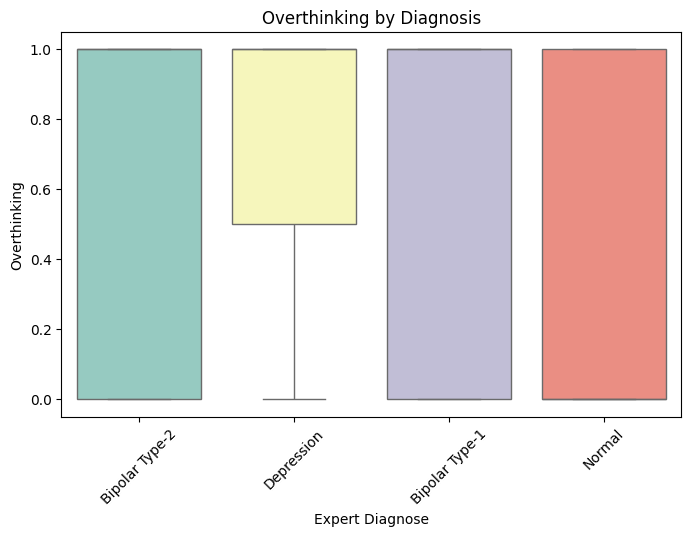

In [20]:
features = ['Sadness', 'Euphoric', 'Exhausted', 'Overthinking']  # pick more if needed
for col in features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Expert Diagnose', y=col, data=df, palette='Set3')
    plt.title(f'{col} by Diagnosis')
    plt.xticks(rotation=45)
    plt.show()

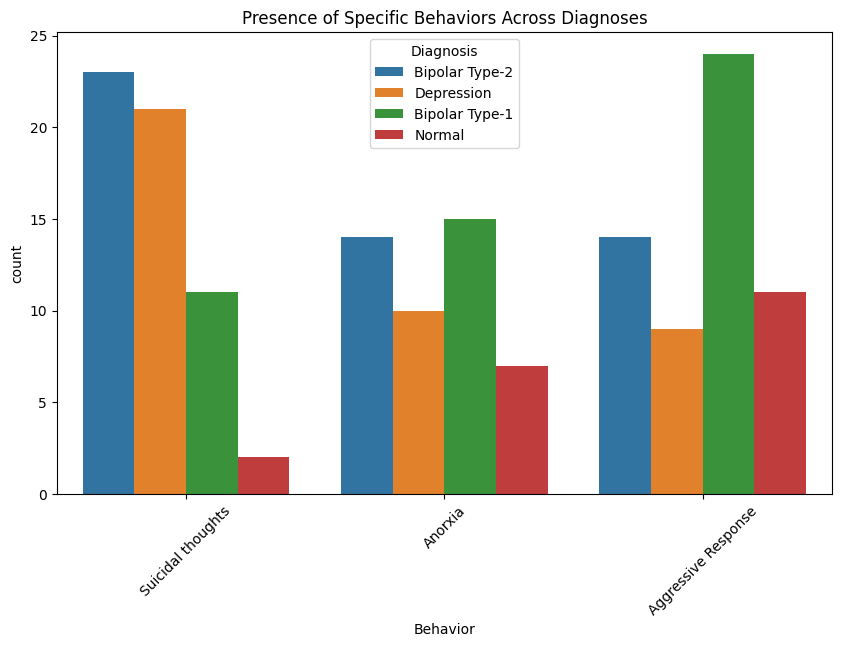

In [21]:
binary_features = ['Suicidal thoughts', 'Anorxia', 'Aggressive Response']

df_melted = df.melt(id_vars='Expert Diagnose', value_vars=binary_features, var_name='Behavior', value_name='Presence')
df_melted['Presence'] = df_melted['Presence'].astype(int)

plt.figure(figsize=(10,6))
sns.countplot(data=df_melted[df_melted['Presence'] == 1], x='Behavior', hue='Expert Diagnose')
plt.title("Presence of Specific Behaviors Across Diagnoses")
plt.xticks(rotation=45)
plt.legend(title='Diagnosis')
plt.show()

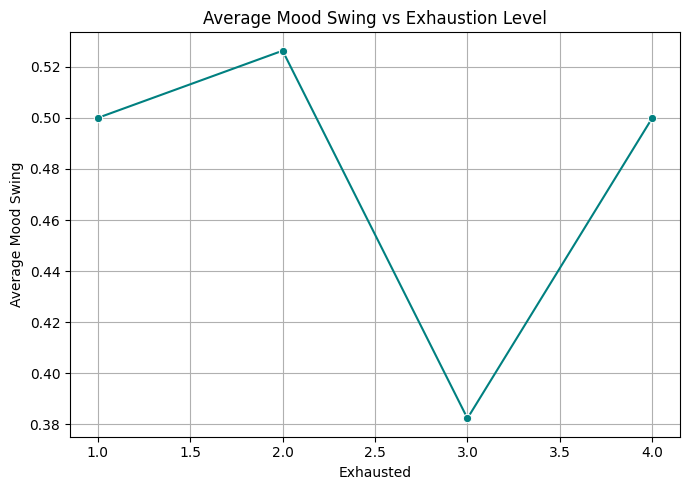

In [22]:
avg_trend = df.groupby('Exhausted')['Mood Swing'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=avg_trend, x='Exhausted', y='Mood Swing', marker='o', color='teal')
plt.title("Average Mood Swing vs Exhaustion Level")
plt.xlabel("Exhausted")
plt.ylabel("Average Mood Swing")
plt.grid(True)
plt.tight_layout()
plt.show()

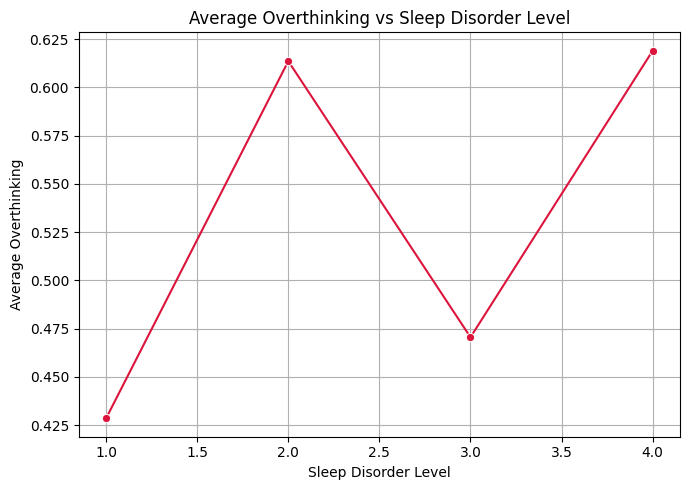

In [23]:
avg_overthinking = df.groupby('Sleep dissorder')['Overthinking'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=avg_overthinking, x='Sleep dissorder', y='Overthinking', marker='o', color='crimson')

plt.title("Average Overthinking vs Sleep Disorder Level")
plt.xlabel("Sleep Disorder Level")
plt.ylabel("Average Overthinking")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df['Expert Diagnose'].unique()

array(['Bipolar Type-2', 'Depression', 'Bipolar Type-1', 'Normal'],
      dtype=object)

In [25]:
mapping_dict = {'Normal': 0, 'Bipolar Type-1': 1, 'Bipolar Type-2': 2, 'Depression': 3}
df['Expert Diagnose'] = df['Expert Diagnose'].map(mapping_dict)
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,2,4,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,3,1,3,4,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,0


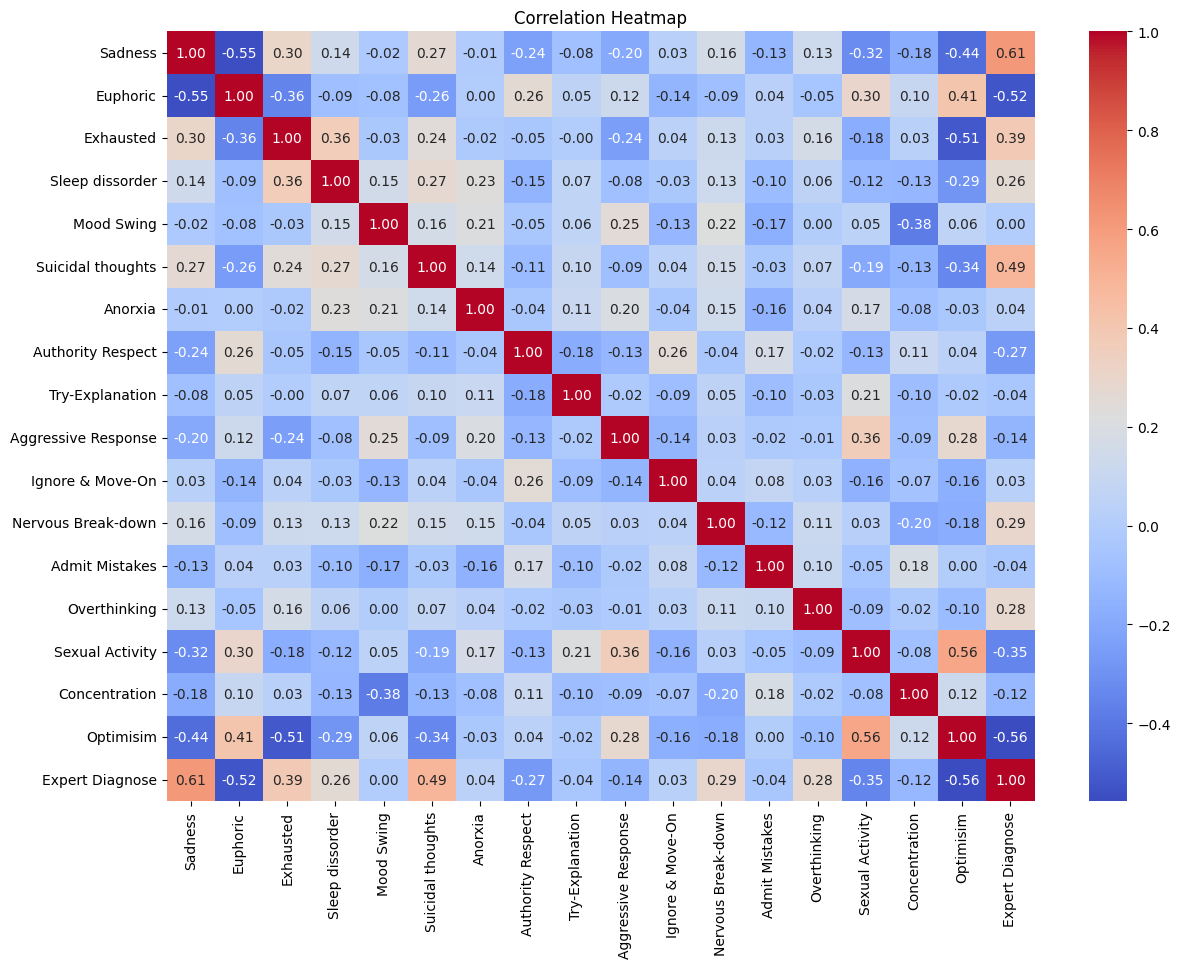

In [26]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **Feature Engineering and ML Implementation**

In [27]:
X = df.drop(['Expert Diagnose'], axis = True)
y = df['Expert Diagnose']

In [28]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


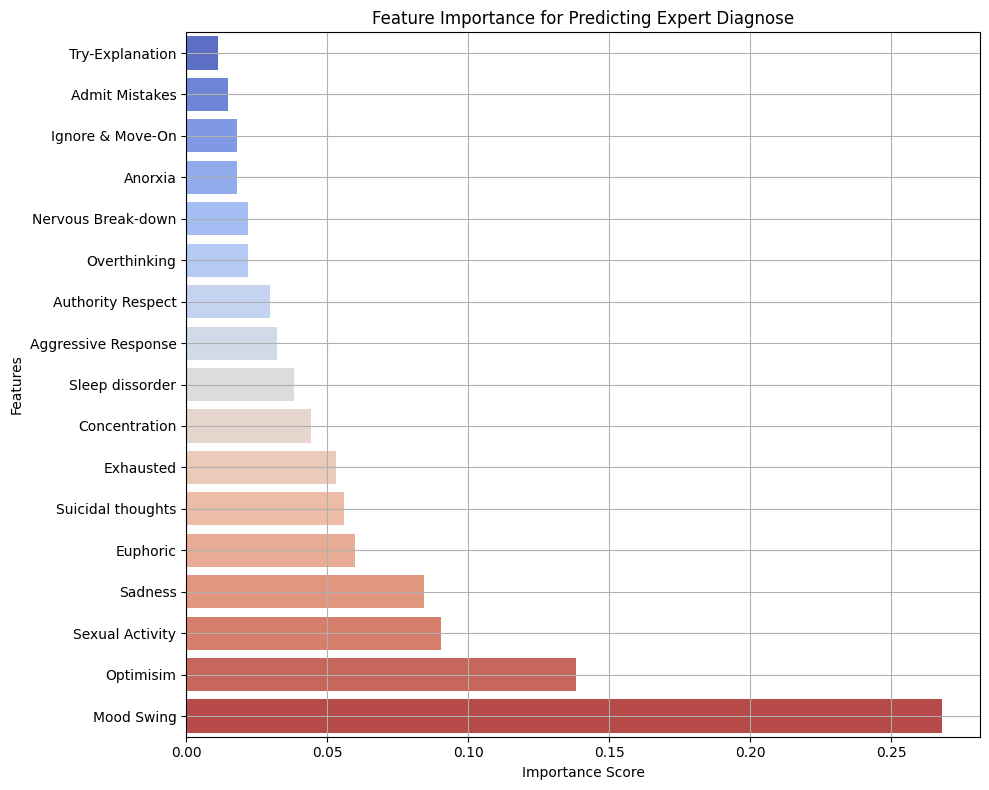

In [29]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10,8))
sns.barplot(x=importances, y=importances.index, palette='coolwarm')
plt.title("Feature Importance for Predicting Expert Diagnose")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=True)

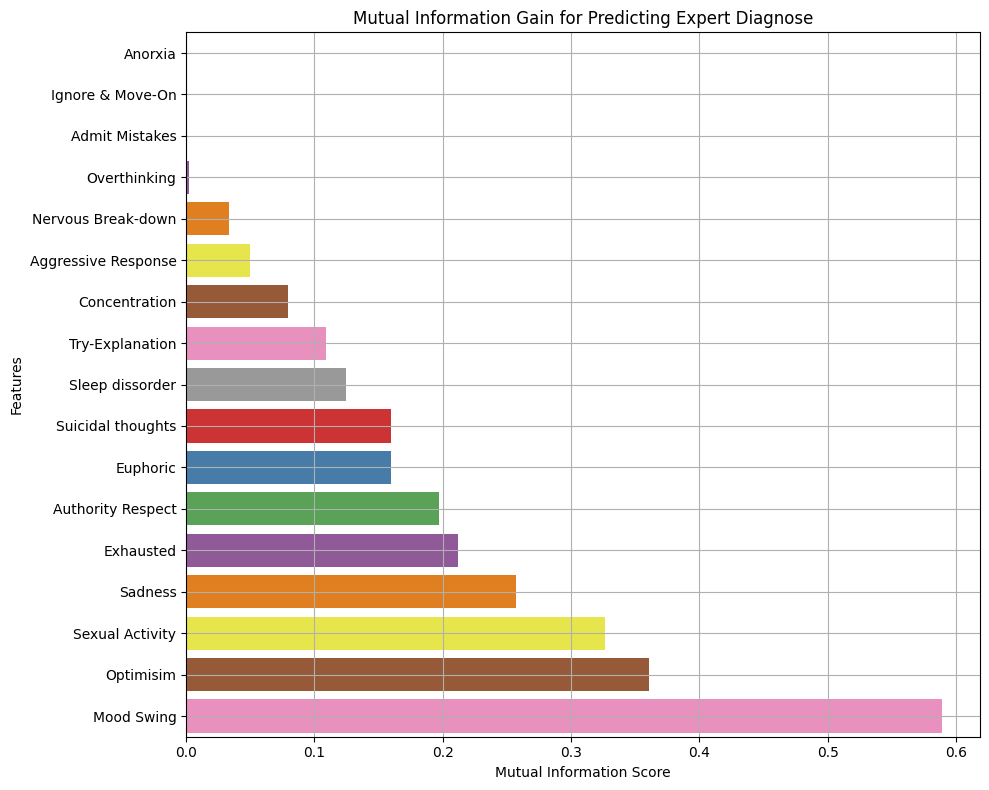

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(x=mi_series, y=mi_series.index, palette='Set1')
plt.title("Mutual Information Gain for Predicting Expert Diagnose")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
df['Concentration'].unique()

array([3, 2, 5, 4, 7, 6, 1, 8], dtype=int64)

In [33]:
selected_features = [
    'Mood Swing', 'Sexual Activity', 'Optimisim', 'Sadness', 'Exhausted',
    'Authority Respect', 'Euphoric', 'Suicidal thoughts', 'Sleep dissorder',
    'Concentration']

X_new = X[selected_features]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [36]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

lr_scores = cross_val_score(lr_pipeline, X, y, cv=5)
print("Logistic Regression CV Accuracy:", np.round(lr_scores.mean(), 4))

lr_scores = cross_val_score(lr_pipeline, X_new, y, cv=5)
print("Logistic Regression CV Accuracy(Feature Selection):", np.round(lr_scores.mean(), 4))

Logistic Regression CV Accuracy: 0.8833
Logistic Regression CV Accuracy(Feature Selection): 0.85


In [37]:
rf = RandomForestClassifier(n_estimators=250, max_depth=4, min_samples_leaf=4,
                            min_samples_split=5, max_features=0.7, bootstrap=True,
                            random_state=42)

rf_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:", np.round(rf_scores.mean(), 4))

rf_scores = cross_val_score(rf, X_new, y, cv=5)
print("Random Forest CV Accuracy(Feature Selection):", np.round(rf_scores.mean(), 4))

Random Forest CV Accuracy: 0.8333
Random Forest CV Accuracy(Feature Selection): 0.85


In [38]:
xgb_model = XGBClassifier(n_estimators=150, max_depth=3, learning_rate=0.1, subsample=0.8,
                          colsample_bytree=0.8, random_state=42, use_label_encoder=False,
                          eval_metric='mlogloss')

xgb_scores = cross_val_score(xgb_model, X, y, cv=5)
print("XGBoost CV Accuracy:", np.round(xgb_scores.mean(), 4))


xgb_scores = cross_val_score(xgb_model, X_new, y, cv=5)
print("XGBoost CV Accuracy:(Feature Selection)", np.round(xgb_scores.mean(), 4))

XGBoost CV Accuracy: 0.8667
XGBoost CV Accuracy:(Feature Selection) 0.8917


In [39]:
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=1, gamma='scale'))
])

svc_scores = cross_val_score(svc_pipeline, X, y, cv=5)
print("SVC CV Accuracy:", np.round(svc_scores.mean(), 4))

svc_scores = cross_val_score(svc_pipeline, X_new, y, cv=5)
print("SVC CV Accuracy(Feature Selection):", np.round(svc_scores.mean(), 4))

SVC CV Accuracy: 0.8917
SVC CV Accuracy(Feature Selection): 0.875


In [40]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn_scores = cross_val_score(knn_pipeline, X, y, cv=5)
print("KNN CV Accuracy:", np.round(knn_scores.mean(), 4))

knn_scores = cross_val_score(knn_pipeline, X_new, y, cv=5)
print("KNN CV Accuracy(Feature Selection):", np.round(knn_scores.mean(), 4))

KNN CV Accuracy: 0.8083
KNN CV Accuracy(Feature Selection): 0.8167


In [41]:
cb = CatBoostClassifier(
    iterations=150,
    learning_rate=0.1,
    depth=4,
    verbose=0,
    random_state=42
)
cb_scores = cross_val_score(cb, X, y, cv=5)
print("CatBoost CV Accuracy:", np.round(cb_scores.mean(), 4))

cb_scores = cross_val_score(cb, X_new, y, cv=5)
print("CatBoost CV Accuracy(Feature Selection):", np.round(cb_scores.mean(), 4))

CatBoost CV Accuracy: 0.9
CatBoost CV Accuracy(Feature Selection): 0.8917


In [42]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_new_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_new_train, y_train, epochs=100, batch_size=8, validation_split=0.1, verbose=1)
loss, accuracy = model.evaluate(X_new_test, y_test)
print(f'ANN Accuracy (Feature Selection): {accuracy:.1f}')



Epoch 1/100


11/11 [==============================] - 1s 13ms/step - loss: 2.6554 - accuracy: 0.2674 - val_loss: 3.0098 - val_accuracy: 0.1000
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 2.2261 - accuracy: 0.2674 - val_loss: 2.5609 - val_accuracy: 0.1000
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 1.9671 - accuracy: 0.2674 - val_loss: 2.2869 - val_accuracy: 0.1000
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 1.7794 - accuracy: 0.2791 - val_loss: 2.1024 - val_accuracy: 0.1000
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 1.6582 - accuracy: 0.3140 - val_loss: 1.9539 - val_accuracy: 0.1000
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 1.5668 - accuracy: 0.3372 - val_loss: 1.8332 - val_accuracy: 0.1000
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 1.5045 - accuracy: 0.3372 - val_loss: 1.7391 - val_accuracy: 0.2000
Epoch 8/

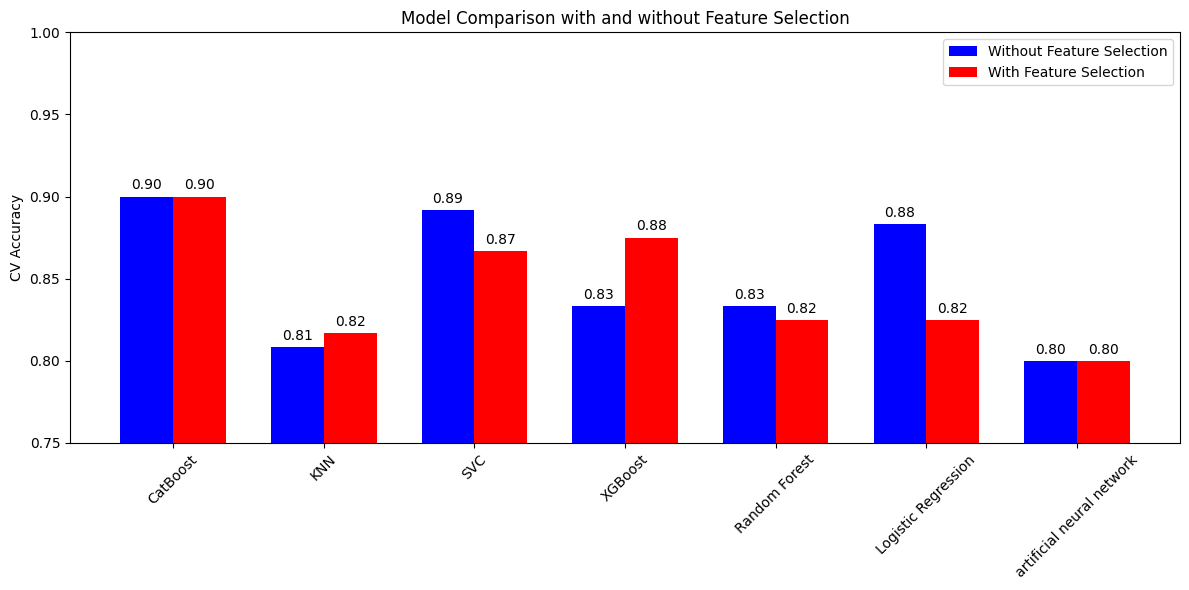

In [43]:
models = [
    'CatBoost', 'KNN', 'SVC', 'XGBoost', 'Random Forest', 'Logistic Regression', 'artificial neural network'
]

accuracy_no_fs = [0.9, 0.8083, 0.8917, 0.8333, 0.8333, 0.8833,0.8]
accuracy_fs = [0.9, 0.8167, 0.8667, 0.875, 0.825, 0.825,0.8]

x = np.arange(len(models)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, accuracy_no_fs, width, label='Without Feature Selection', color='blue')
bars2 = ax.bar(x + width/2, accuracy_fs, width, label='With Feature Selection', color='red')

ax.set_ylabel('CV Accuracy')
ax.set_title('Model Comparison with and without Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_ylim(0.75, 1.0)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,y,test_size=.25, random_state=42)
model = CatBoostClassifier(
    iterations=150,
    learning_rate=0.1,
    depth=4,
    verbose=0,
    random_state=42)
model.fit(xtrain,ytrain)

In [45]:
# Save model after training (done once)
import joblib
joblib.dump(model, 'mental_health_model.pkl')

['mental_health_model.pkl']